# Лабабаторная работа №2: Классификация


In [3]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn.utils import resample
import math
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

Предскажем прогулку:


In [35]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

df = pd.DataFrame(data, columns=['weather', 'stroll'])

In [36]:
p_sunny = len(df.loc[df['weather'] == 'солнечно']) / len(df)
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_snow = len(df.loc[df['weather'] == 'снег']) / len(df)
p_cloudly = len(df.loc[df['weather'] == 'облачно']) / len(df)

print(p_sunny, p_rain, p_snow, p_cloudly)

0.26666666666666666 0.2 0.26666666666666666 0.26666666666666666


In [37]:
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_not_stroll = len(df.loc[df['stroll'] == False]) / len(df)
print(p_stroll, p_not_stroll)

0.5333333333333333 0.4666666666666667


In [38]:
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])

In [39]:
p_stroll_if_rain = (p_stroll*p_rain_if_stroll)/p_rain
p_stroll_if_rain

0.3333333333333333

Загрузим и предобработаем датасет:


In [40]:
data = pd.read_csv('..\data\classification\superhero_battles.csv')

In [41]:
data.isna().sum()

Battle_title           0
Battle_url             0
Sup_1_Character        0
Sup_1_Name         28525
Sup_1_Universe     20048
Sup_2_Character        0
Sup_2_Name         44206
Sup_2_Universe     26682
Superhero_1_win        0
Superhero_2_win        0
Draw                   0
dtype: int64

In [42]:
data.head(5)

,Battle_title,Battle_url,Sup_1_Character,Sup_1_Name,Sup_1_Universe,Sup_2_Character,Sup_2_Name,Sup_2_Universe,Superhero_1_win,Superhero_2_win,Draw
0,Superman vs Thor,https://www.superherodb.com/90-103/,Superman,Kal-El,Prime Earth,Thor,Thor Odinson,Earth-616,46.0,51.6,2.4
1,Thing vs Colossus,https://www.superherodb.com/90-8/,Thing,Ben Grimm,Earth-616,Colossus,Peter Rasputin,Earth-616,44.3,52.9,2.8
2,Skaar vs The Flash,https://www.superherodb.com/90-9/,Skaar,Skaar,Earth-616,The Flash,Jay Garrick,Prime Earth,30.0,60.0,10.0
3,Abomination vs Darth Sidious,https://www.superherodb.com/90-518547/,Abomination,Emil Blonsky,Earth-616,Darth Sidious,Sheev Palpatine,Star Wars,50.0,50.0,0.0
4,Dazzler vs Daywing,https://www.superherodb.com/90-231336/,Dazzler,Alison Blaire,Earth-616,Daywing,Gray Dickson,NaN,10.5,89.5,0.0


In [43]:
data['Sup_1_Name'] = data['Sup_1_Name'].fillna('Unknown')
data['Sup_1_Universe'] = data['Sup_1_Universe'].fillna('Unknown')
data['Sup_2_Name'] = data['Sup_2_Name'].fillna('Unknown')
data['Sup_2_Universe'] = data['Sup_2_Universe'].fillna('Unknown')

In [44]:
data.isna().sum()

Battle_title       0
Battle_url         0
Sup_1_Character    0
Sup_1_Name         0
Sup_1_Universe     0
Sup_2_Character    0
Sup_2_Name         0
Sup_2_Universe     0
Superhero_1_win    0
Superhero_2_win    0
Draw               0
dtype: int64

In [45]:
data.describe()

,Superhero_1_win,Superhero_2_win,Draw
count,198677.000000,198677.000000,198677.000000
mean,48.218736,42.782786,8.998477
std,45.561848,45.076165,25.003675
min,0.000000,0.000000,-0.100000
25%,0.000000,0.000000,0.000000
50%,50.000000,25.000000,0.000000
75%,100.000000,100.000000,0.000000
max,100.000000,100.000000,100.000000


In [46]:
data = data.drop(data.columns[[0, 1]], axis=1)

In [47]:
data = data.drop_duplicates()
data

,Sup_1_Character,Sup_1_Name,Sup_1_Universe,Sup_2_Character,Sup_2_Name,Sup_2_Universe,Superhero_1_win,Superhero_2_win,Draw
0,Superman,Kal-El,Prime Earth,Thor,Thor Odinson,Earth-616,46.0,51.6,2.4
1,Thing,Ben Grimm,Earth-616,Colossus,Peter Rasputin,Earth-616,44.3,52.9,2.8
2,Skaar,Skaar,Earth-616,The Flash,Jay Garrick,Prime Earth,30.0,60.0,10.0
3,Abomination,Emil Blonsky,Earth-616,Darth Sidious,Sheev Palpatine,Star Wars,50.0,50.0,0.0
4,Dazzler,Alison Blaire,Earth-616,Daywing,Gray Dickson,Unknown,10.5,89.5,0.0
...,...,...,...,...,...,...,...,...,...
198672,Cell,Cell,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0
198673,General Zod,Dru-Zod,DCEU,Captain Marvel (What If...?),Carol Danvers,MCU,20.0,80.0,0.0
198674,Majin Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0
198675,Kid Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0


Придумаем не очень крутую лямбду, чтобы создать разбиение на классы:


In [48]:
data['first1'] = data.apply ( lambda x: x. Superhero_1_win >= x. Superhero_2_win, axis = 1 )
data['first2'] = data.apply ( lambda x: x. Superhero_1_win > x. Draw, axis = 1 )
data['second1'] = data.apply ( lambda x: x. Superhero_2_win > x. Superhero_1_win, axis = 1 )
data['second2'] = data.apply ( lambda x: x. Superhero_2_win > x. Draw, axis = 1 )
data['dr1'] = data.apply ( lambda x: x. Draw > x. Superhero_2_win, axis = 1 )
data['dr2'] = data.apply ( lambda x: x. Draw > x. Superhero_1_win, axis = 1 )
data['first'] = data['first1'] * data['first2']
data['second'] = data['second1'] * data['second2']
data['dr'] = data['dr1'] * data['dr2']
data

,Sup_1_Character,Sup_1_Name,Sup_1_Universe,Sup_2_Character,Sup_2_Name,Sup_2_Universe,Superhero_1_win,Superhero_2_win,Draw,first1,first2,second1,second2,dr1,dr2,first,second,dr
0,Superman,Kal-El,Prime Earth,Thor,Thor Odinson,Earth-616,46.0,51.6,2.4,False,True,True,True,False,False,False,True,False
1,Thing,Ben Grimm,Earth-616,Colossus,Peter Rasputin,Earth-616,44.3,52.9,2.8,False,True,True,True,False,False,False,True,False
2,Skaar,Skaar,Earth-616,The Flash,Jay Garrick,Prime Earth,30.0,60.0,10.0,False,True,True,True,False,False,False,True,False
3,Abomination,Emil Blonsky,Earth-616,Darth Sidious,Sheev Palpatine,Star Wars,50.0,50.0,0.0,True,True,False,True,False,False,True,False,False
4,Dazzler,Alison Blaire,Earth-616,Daywing,Gray Dickson,Unknown,10.5,89.5,0.0,False,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198672,Cell,Cell,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0,False,False,True,True,False,False,False,True,False
198673,General Zod,Dru-Zod,DCEU,Captain Marvel (What If...?),Carol Danvers,MCU,20.0,80.0,0.0,False,True,True,True,False,False,False,True,False
198674,Majin Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0,False,False,True,True,False,False,False,True,False
198675,Kid Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0,False,False,True,True,False,False,False,True,False


In [49]:
data = data.drop(columns=['Superhero_1_win', 'Superhero_2_win', 'Draw'], axis=1)
data

,Sup_1_Character,Sup_1_Name,Sup_1_Universe,Sup_2_Character,Sup_2_Name,Sup_2_Universe,first1,first2,second1,second2,dr1,dr2,first,second,dr
0,Superman,Kal-El,Prime Earth,Thor,Thor Odinson,Earth-616,False,True,True,True,False,False,False,True,False
1,Thing,Ben Grimm,Earth-616,Colossus,Peter Rasputin,Earth-616,False,True,True,True,False,False,False,True,False
2,Skaar,Skaar,Earth-616,The Flash,Jay Garrick,Prime Earth,False,True,True,True,False,False,False,True,False
3,Abomination,Emil Blonsky,Earth-616,Darth Sidious,Sheev Palpatine,Star Wars,True,True,False,True,False,False,True,False,False
4,Dazzler,Alison Blaire,Earth-616,Daywing,Gray Dickson,Unknown,False,True,True,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198672,Cell,Cell,DB,Infinity Ultron (What If...?),Ultron,MCU,False,False,True,True,False,False,False,True,False
198673,General Zod,Dru-Zod,DCEU,Captain Marvel (What If...?),Carol Danvers,MCU,False,True,True,True,False,False,False,True,False
198674,Majin Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,False,False,True,True,False,False,False,True,False
198675,Kid Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,False,False,True,True,False,False,False,True,False


Сбалансируем классы:


In [50]:
data['first'] = data['first'].replace(True, 1)
data['second'] = data['second'].replace(True, 2)
data['dr'] = data['dr'].replace(True, 0)
data['class'] = data[['first','second','dr']].sum(axis=1).astype('int')
data = data.drop(data.columns[[6, 7, 8, 9, 10, 11, 12, 13, 14]], axis=1)
print(f" Draw = {len(data[data['class']==0])}, First = {len(data[data['class']==1])}, Second = {len(data[data['class']==2])}")
draw = data[data['class']==0]
undraw = data[data['class']!=0]
draw = resample(draw,
             replace=True,
             n_samples=40000,
             random_state=42)
data = pd.concat([draw, undraw])
print(f" Draw = {len(data[data['class']==0])}, First = {len(data[data['class']==1])}, Second = {len(data[data['class']==2])}")

 Draw = 9746, First = 50229, Second = 41308
 Draw = 40000, First = 50229, Second = 41308


In [51]:
data

,Sup_1_Character,Sup_1_Name,Sup_1_Universe,Sup_2_Character,Sup_2_Name,Sup_2_Universe,class
83967,Noel Vermillion,Noel Vermillion,BlazBlue,Saber (Attila),Saber,Nasuverse,0
13241,Hutch Mansell,Unknown,Nobody,Six,Unknown,GrayManMovie,0
76638,The Law Of Identity,Kena Soga,IUND,Tzimisce Antediluvian,Tzimisce Antediluvian,WOD,0
75967,The Creator,The Creator,Darksiders,Cyscek,Cyscek,WOD,0
78186,Emperor Of Mankind,God Emperor,Warhammer 40K,Animal Man (BODY OF GOD),Bernhard,Vertigo,0
...,...,...,...,...,...,...,...
198672,Cell,Cell,DB,Infinity Ultron (What If...?),Ultron,MCU,2
198673,General Zod,Dru-Zod,DCEU,Captain Marvel (What If...?),Carol Danvers,MCU,2
198674,Majin Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,2
198675,Kid Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,2


In [52]:
y = pd.DataFrame(data['class'])
X = data.drop(['class'], axis=1)
y

,class
83967,0
13241,0
76638,0
75967,0
78186,0
...,...
198672,2
198673,2
198674,2
198675,2


Ǫ̵̼͇̲̟͍̠͒͑̓̍̆̾n̶̡̛̰͈̗̰̒̈́̍̈́̎̃̇͑̆̐̕ȅ̵̡̛͉̭̠̩̙͈̟̯͙̫͈͎̞̑̉̔̅̎͐̎̌͊̑͂̚͝-̶̯͉̙̹́͊̑̉̅̄̐͐ͅͅh̸̢̒͑̒o̸̧̡͚̠͚̰͕̬̞̰͚̿̊͋͌́͜ͅṭ̷̘̗̼́̃̃̑̉̒̓͌ ̴̱͉̠̪̥̐̿̈́̊̏͋͂̕͠к̵̨̨͙̥̄̆̀̓͝ӧ̵̬͈̳̬́͘д̴̡͔̗͍̺̫̰̝̾̓́̚ͅи̴̨̘͚̮͇̹̦̦͗̀̄̂р̶̣́̃̒̿̉̈́̂͒͂̂̍̑̀̕͝о̵̢̣̞͇̱̅̈́̀́̓̈͂̍̂͒͋̕̕͝͝в̸̤͔͔͇͎̥͕͈͚͔̱͖̃̋͌̋̓̋̀͑͋а̵̨̝̳̘̗̜͉̜̥̥̘͒̎̽͑̐͂͒̃͊̓͐͘͘̚̕ͅͅн̸̢̰̫̟͂̉̐́̄̋̍̄̇̈̕͝и̶̧͙̩̙͉̺̯̤͙̦̂̆̑̓͜͠ѐ̷̢̧̛̯̼͚̞͖͙͉̊̀͐̅͌̉̋̊̕̚ͅ ̴̨̧̠̞̯̖͙̯̇̑͊͆̂͘̚͜͠1̶̩̯̻̯̇̓́̂͛̆̐̕0̷̡̢̫̘̱̘̓͂̈́̿͋͌͒͝ ̷̨̠͎̜̤̤̠̤͖͉̘̗̲͌́̎̓͛̽̀́͜т̵̛͇͔̹̱̙̗̭͇̙͔̪̜̜̟͊̀̈́̀̅е̶̢̨̜̥̦̞̮̻͇̱͇͎̗͈̻̑͗̏̂к̵̨̘͖͔͓̬̮͎̙̫͖̀̊̆͒̏̈͌̋̿͑̆̄̚с̷̮̖̳̠͎̤̙̬̻̪̠̙̩͆̂̃͘т̷̈́̒̃̒̂͐͜о̵̥̭̦̏̚͠в̷̩͓͈͓͍̺̻͙̠͓̐̂̓̉ӹ̵̧̢̟͉̼̲̥͇̺̀̑͗͋̃͗̎̍̓ͅх̴̤̔̌͐̓͗͆̋̇́̄͑̚͝͝ ̸̮̳̲̦̮͍̄п̴̜̝̱͎̋̀͆͋̚р̸̗̜̞̞̖͍̼̩̈́̂͐̓́̄̾͛̌͂̚ӥ̶̡̜̝̭̲͖̪͕̟͔̦̹̖̗́̃̅̓͂̅͒͛̚ͅз̸̛̥͖̦̖̩̥̦͈̰̒̇͑͌͒͌̽͒͗̏̂͘͘͝н̶͚̪͔̼̏̎͜а̷̧̥̣̝̼̤͙̣̩̫̩̺̊͛̎͒̈́͜к̴̧̯̲̀͘̕о̷̢͍͖̼͖͎̼͉̥̼̻̊̇̾̓̂ͅв̴͔̺̝̞̠̭͠͝ͅ


In [53]:
cat_features = ['Sup_1_Character', 'Sup_1_Name','Sup_1_Universe', 'Sup_2_Character', 'Sup_2_Name','Sup_2_Universe']
prefixes = ['s1c', 's1n', 's1u', 's2c', 's2n', 's2u']
X = pd.get_dummies(columns=cat_features, data=X, prefix=prefixes)
X

,s1c_ A,s1c_ Agent Jones (Jonesy),s1c_ Aion,s1c_ All Writers,s1c_ Almighty Creator,s1c_ Alter 1106,s1c_ Anansi,s1c_ Angra Mainyu,s1c_ Antithesis,s1c_ Archangel Mike,...,s2u_Xenogears,s2u_Xenoverse,s2u_YotD,s2u_Young Justice,s2u_Yu Yu Hakusho,s2u_Yu-Gi-Oh!,s2u_ZTV,s2u_Zelda,s2u_Zorro,s2u_Æon Flux
83967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76638,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198673,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105229, 31854), (105229, 1), (26308, 31854), (26308, 1))

Для классификаторов, хранящих всю матрицу X, будем ограничивать выборку, чтобы она влезла в ОЗУ


In [57]:
X_train_knn = X_train[:10000]
X_test_knn = X_test[:10000]
y_train_knn = y_train[:10000]
y_test_knn = y_test[:10000]

Масштабируем признаки:


In [59]:
scaler = StandardScaler()
X_train_knn = scaler.fit_transform(X_train_knn)
X_test_knn = scaler.transform(X_test_knn)

КНН:


In [25]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [5, 6, 7, 8, 9, 10]}
knn_optimal = GridSearchCV(KNeighborsClassifier(algorithm='auto'), parameters).fit(X_train_knn, y_train_knn)
knn_optimal.best_params_

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

{'n_neighbors': 10}

In [26]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_knn, y_train_knn)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [27]:
y_bin_knn_pred = knn.predict(X_test_knn)
print(classification_report(y_test_knn, y_bin_knn_pred))
confusion_matrix(y_test_knn, y_bin_knn_pred)

              precision    recall  f1-score   support

           0       0.44      0.49      0.47      3047
           1       0.44      0.69      0.54      3849
           2       0.52      0.10      0.17      3104

    accuracy                           0.45     10000
   macro avg       0.47      0.43      0.39     10000
weighted avg       0.47      0.45      0.40     10000



array([[1500, 1423,  124],
       [1014, 2664,  171],
       [ 875, 1910,  319]], dtype=int64)

In [28]:
roc_auc_score(y_test_knn, knn.predict_proba(X_test_knn), multi_class='ovr')


0.6112302792556592

Наивный Байес:


In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [30]:
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.99      0.60      8060
           1       0.75      0.14      0.24     10102
           2       0.48      0.36      0.41      8146

    accuracy                           0.47     26308
   macro avg       0.55      0.49      0.42     26308
weighted avg       0.57      0.47      0.40     26308



In [31]:
roc_auc_score(y_test, gnb.predict_proba(X_test), multi_class='ovr')

0.6189403746964702

Логистическая регрессия:


In [56]:
lr = LogisticRegression(random_state=42).fit(X_train_knn, y_train_knn)
y_pred = lr.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred))

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.51      0.54      0.52      3047
           1       0.53      0.51      0.52      3849
           2       0.45      0.45      0.45      3104

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [57]:
y_pred.shape

(10000,)

In [58]:
roc_auc_score(y_test_knn, lr.predict_proba(X_test_knn), multi_class='ovr')

0.6580295795859817

Машина опорных векторов:


In [25]:
from sklearn import svm
svmc = svm.SVC(probability=True)
svmc.fit(X_train_knn, y_train_knn)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(probability=True)

In [26]:
y_pred = svmc.predict(X_test_knn)
print(classification_report(y_test_knn, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.45      0.51      3047
           1       0.48      0.65      0.55      3849
           2       0.45      0.36      0.40      3104

    accuracy                           0.50     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.50      0.49     10000



In [59]:
roc_auc_score(y_test_knn, svmc.predict_proba(X_test_knn), multi_class='ovr')

0.6803538499273426

Реализуем метрики:


In [1]:
class Metrics:
    def __init__(self, test, pred):
        self.TP = 0
        for i, j in zip(test, pred):
            if i == j == True:
                self.TP += 1
        self.FN = np.count_nonzero(test == True) - self.TP
        self.FP = np.count_nonzero(pred == True) - self.TP
        self.TN = test.size - self.TP - self.FP - self.FN
        self.P = self.TP + self.FN
        self.N = self.TN + self.FP
    def conf_matr(self):
        print('%-7s %-7s' % ('ㅤ', 'реальность'))
        print('%-7s %5d %5d' % ('прог', self.TP, self.FP))
        print('%-7s %5d %5d' % ('ноз', self.FN, self.TN))
    def accuracy(self):
        return (self.TP + self.TN)/(self.P + self.N)
    def precision(self):
        return self.TP/(self.TP + self.FP)
    def recall(self):
        return self.TP/self.P
    def F1(self):
        return 2/(1/self.precision() + 1/self.recall())

In [5]:
m = Metrics(np.array([True, True, False, True]), np.array([True, False, False, False]))
m.conf_matr()
print(m.accuracy(), m.precision(), m.recall(), m.F1())

ㅤ       реальность
прог        1     0
ноз         2     1
0.5 1.0 0.3333333333333333 0.5


Реализуем КНН:


In [6]:
class k_nn:
    def __init__(self, X_train, y_train):
        self.xtr = np.array(X_train)
        self.ytr = np.array(y_train)
    def predict(self, X_test, k):
        pred = np.array([])
        X_test = np.array(X_test)
        for i in range(X_test.shape[0]):
            distances = pd.Series(pow(pow(self.xtr - X_test[i], 2).sum(axis = 1), 1/2)).sort_values()[:k]
            values = []
            for j in distances.index:
                values.append(self.ytr[j])
            pred = np.append(pred, bool(np.bincount(np.array(values)).argmax()))
        return pred

In [7]:
X, y = make_classification()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [18]:
knn = k_nn(X_train, y_train)
y_pred = knn.predict(X_test, 8)

In [19]:
knn_m = Metrics(y_test, y_pred)
knn_m.conf_matr()
print(knn_m.accuracy(), knn_m.precision(), knn_m.recall(), knn_m.F1())

ㅤ       реальность
прог       10     0
ноз         3     7
0.85 1.0 0.7692307692307693 0.8695652173913044


Text(0, 0.5, 'True Positive Rate (Positive label: 1)')

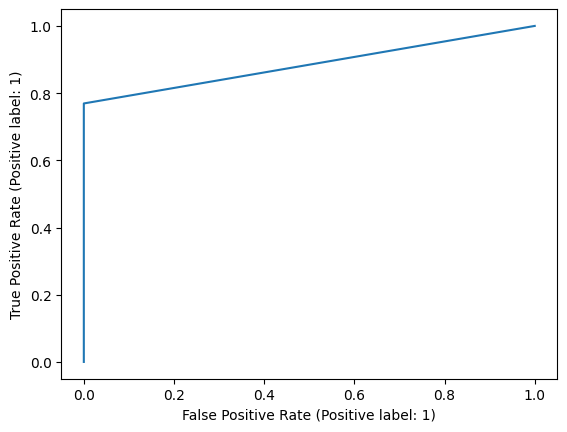

In [20]:
fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")

Реализуем Наивного Байеса


In [21]:
class GNB:
    def __init__(self, X_train, y_train):
        self.xtr = np.array(X_train)
        self.ytr = np.array(y_train)
        self.xtr_t = np.array([np.zeros(self.xtr.shape[1])])
        self.xtr_f = np.array([np.zeros(self.xtr.shape[1])])
        for i in range(self.ytr.size):
            if self.ytr[i] == True:
                self.xtr_t = np.concatenate((self.xtr_t, np.array([self.xtr[i]])), axis=0)
            else:
                self.xtr_f = np.concatenate((self.xtr_f, np.array([self.xtr[i]])), axis=0)
        self.xtr_t = self.xtr_t[1:]
        self.xtr_f = self.xtr_f[1:]
        self.mean_t = np.mean(self.xtr_t, axis = 0)
        self.mean_f = np.mean(self.xtr_f, axis = 0)
        self.std_t = np.std(self.xtr_t, axis = 0)
        self.std_f = np.std(self.xtr_f, axis = 0)
        self.p_true = np.count_nonzero(self.ytr == True)/self.ytr.size
        self.p_false = 1 - self.p_true
    def predict(self, X_test):
        pred = np.array([])
        X_test = np.array(X_test)
        for i in X_test:
            prob_t = 1
            prob_f = 1
            for j in range(i.size):
                prob_t *= 1/(self.std_t[j] * math.sqrt(2 * math.pi))*math.exp(-pow(i[j] - self.mean_t[j], 2)/
                                                                                     (2*pow(self.std_t[j], 2)))*self.p_true
                prob_f *= 1/(self.std_f[j] * math.sqrt(2 * math.pi))*math.exp(-pow(i[j] - self.mean_f[j], 2)/
                                                                                     (2*pow(self.std_f[j], 2)))*self.p_false
            if prob_t >= prob_f:
                pred = np.append(pred, True)
            else:
                pred = np.append(pred, False)
        return pred

In [ ]:
gnb = GNB(X_train, y_train)
y_pred = gnb.predict(X_test)

In [22]:
gnb_m = Metrics(y_test, y_pred)
gnb_m.conf_matr()
print(gnb_m.accuracy(), gnb_m.precision(), gnb_m.recall(), gnb_m.F1())

ㅤ       реальность
прог       10     0
ноз         3     7
0.85 1.0 0.7692307692307693 0.8695652173913044


Text(0, 0.5, 'True Positive Rate (Positive label: 1)')

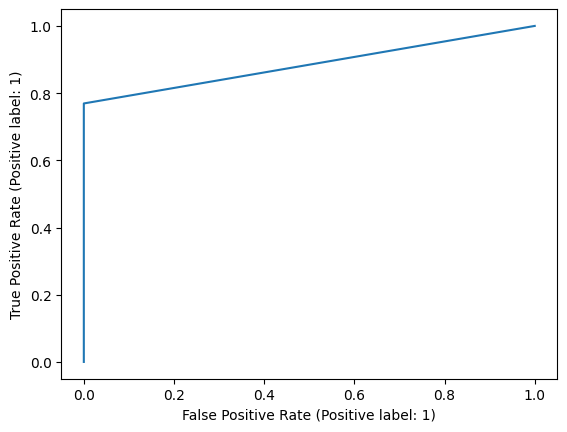

In [23]:
fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")